In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import imageio

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

color_list = np.array([(255, 255, 255),  # 0.0
                       (245, 245, 255),  # 0.2
                       (180, 180, 255),  # 0.5
                       (120, 120, 255),  # 1.5
                       (20,  20, 255),   # 2.5
                       (0, 216, 195),    # 4.0
                       (0, 150, 144),    # 6.0
                       (0, 102, 102),    # 10
                       (255, 255,   0),  # 15
                       (255, 200,   0),  # 20
                       (255, 150,   0),  # 30
                       (255, 100,   0),  # 40
                       (255,   0,   0),  # 50
                       (200,   0,   0),  # 60
                       (120,   0,   0),  # 75
                       (40,   0,   0)])  # > 100

color_list = color_list/255.
bom_cm = LinearSegmentedColormap.from_list("BOM-RF3", color_list, N=32)

In [4]:
mse = load_model('../small/unet.h5')

In [18]:
import xarray as xr
from datetime import datetime
from datetime import timedelta


def plot_prec(d):
    dp = d - timedelta(0,10*60)

    rf_fp = "/data/pluvi_pondus/Rainfields/310_{}_{}.prcp-c10.nc".format(d.strftime("%Y%m%d"), d.strftime("%H%M%S"))
    h8_fp = "/data/pluvi_pondus/HIM8_AU_2B/HIM8_2B_AU_{}.nc".format(d.strftime("%Y%m%d"))
    h8p_fp = "/data/pluvi_pondus/HIM8_AU_2B/HIM8_2B_AU_{}.nc".format(dp.strftime("%Y%m%d"))

    rf_ds = xr.open_dataset(rf_fp)
    h8_ds = xr.open_dataset(h8_fp)
    h8p_ds = xr.open_dataset(h8p_fp)

    b8 = h8_ds.B8.sel(time=d).data[::2, ::2]
    b14 = h8_ds.B14.sel(time=d).data[::2, ::2]
    b8p = h8p_ds.B8.sel(time=dp).data[::2, ::2]
    b14p =h8p_ds.B14.sel(time=dp).data[::2, ::2]

    rf_ds.close()
    h8_ds.close()
    h8p_ds.close()

    x = np.stack((b8p,b14p,b8,b14), axis=-1)
    
    out = mse.predict(x[None,1:,201:,:])[:,:,:,0]
    
    plt.imshow(out[0,:,:], cmap=bom_cm)

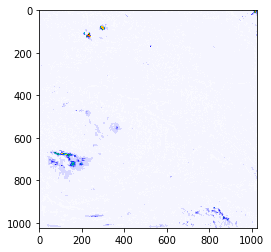

In [19]:
d = datetime(2018, 11, 3, 0, 0)

plot_prec(d)

In [38]:
tiles = {"VICTAS": [1130.8837, -4376.935], 
         "SYDM": [1740.4043, -3757.409], 
         "W_NSW": [935.5831, -3523.967], 
         "SA": [189.0527, -3376.863], 
         "SE_WA": [-661.3803, -3393.506], 
         "SW_WA": [-1414.6972, -3458.529], 
         "NW_WA": [-1519.7374, -2568.012], 
         "NE_WA": [-710.4872, -2498.161], 
         "N_SA": [203.0897, -2480.281], 
         "W_QLD": [1010.0804, -2574.165], 
         "SE_QLD": [1790.4011, -2828.908], 
         "NW_NT": [-704.899, -1609.515], 
         "NT": [216.9767, -1593.277], 
         "N_QLD": [867.3753, -1618.745], 
         "NE_QLD": [1597.875, -1905.570], 
         "NW_WA_COAST": [-1623.6555, -1687.006]}

tiles

{'VICTAS': [1130.8837, -4376.935],
 'SYDM': [1740.4043, -3757.409],
 'W_NSW': [935.5831, -3523.967],
 'SA': [189.0527, -3376.863],
 'SE_WA': [-661.3803, -3393.506],
 'SW_WA': [-1414.6972, -3458.529],
 'NW_WA': [-1519.7374, -2568.012],
 'NE_WA': [-710.4872, -2498.161],
 'N_SA': [203.0897, -2480.281],
 'W_QLD': [1010.0804, -2574.165],
 'SE_QLD': [1790.4011, -2828.908],
 'NW_NT': [-704.899, -1609.515],
 'NT': [216.9767, -1593.277],
 'N_QLD': [867.3753, -1618.745],
 'NE_QLD': [1597.875, -1905.57],
 'NW_WA_COAST': [-1623.6555, -1687.006]}

In [48]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


color_list = np.array([(255, 255, 255),  # 0.0
                       (245, 245, 255),  # 0.2
                       (180, 180, 255),  # 0.5
                       (120, 120, 255),  # 1.5
                       (20,  20, 255),   # 2.5
                       (0, 216, 195),    # 4.0
                       (0, 150, 144),    # 6.0
                       (0, 102, 102),    # 10
                       (255, 255,   0),  # 15
                       (255, 200,   0),  # 20
                       (255, 150,   0),  # 30
                       (255, 100,   0),  # 40
                       (255,   0,   0),  # 50
                       (200,   0,   0),  # 60
                       (120,   0,   0),  # 75
                       (40,   0,   0)])  # > 100

color_list = color_list/255.

bom_cm = LinearSegmentedColormap.from_list("BOM-RF3", color_list, N=32)
bom_cm.set_bad(color='gray')

<xarray.Dataset>
Dimensions:        (n2: 2, x: 2450, y: 2050)
Coordinates:
  * y              (y) float64 -1.001e+03 -1.003e+03 ... -5.097e+03 -5.099e+03
  * x              (x) float64 -2.299e+03 -2.297e+03 ... 2.597e+03 2.599e+03
Dimensions without coordinates: n2
Data variables:
    valid_time     datetime64[ns] ...
    start_time     datetime64[ns] ...
    proj           int8 ...
    y_bounds       (y, n2) float64 ...
    x_bounds       (x, n2) float64 ...
    precipitation  (y, x) float32 ...
Attributes:
    Conventions:         CF-1.7
    contributing_sites:  [ 2  3  4  5  6  8  9 14 16 17 19 22 24 25 27 28 29 ...
    institution:         Commonwealth of Australia, Bureau of Meteorology (AB...
    licence:             http://www.bom.gov.au/other/copyright.shtml
    source:              rainfields 3.1.4 ho-rainfields 2018-10-15
    station_id:          310
    station_name:        Ausm310
    title:               Bias Corrected Radar Accumulation Mosaic (10 min) <xarray.DataArray '

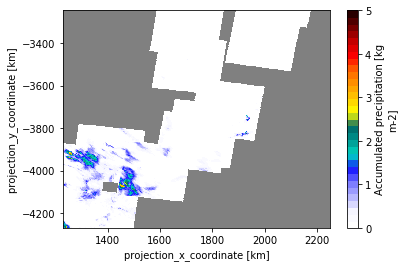

In [149]:
def plot_rainfields(loc, date):

    ds = xr.open_dataset("/data/pluvi_pondus/Rainfields/310_{}_{}.prcp-c10.nc".format(d.strftime("%Y%m%d"),
                                                                                            d.strftime("%H%M%S")))
    
    print(ds, ds.valid_time, ds.start_time)

    ds = ds.precipitation.sel(x=slice(loc[0]-512,loc[0]+512),
                        y=slice(loc[1]+512,loc[1]-512))


    ds.plot(cmap=bom_cm, vmin=0, vmax=5)
    
d = datetime(2018, 11, 6, 0, 0)
plot_rainfields(tiles["SYDM"], d)

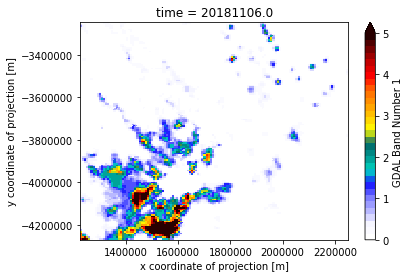

In [145]:
def plot_gpm(loc, date):
    ds = xr.open_dataset("/data/pluvi_pondus/GPM/GPM_BoM_201811.nc")

    ds = ds.sel(x=slice((loc[0]-512)*1000,(loc[0]+512)*1000),
                y=slice((loc[1]+512)*1000,(loc[1]-512)*1000))

    ds.PrecCal.isel(time=481).plot(cmap=bom_cm, vmin=0, vmax=5)
    
plot_gpm(tiles["SYDM"], d)

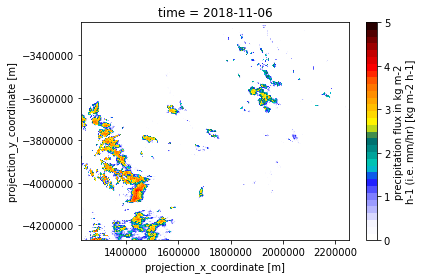

In [153]:
def plot_crr(loc, date):
    ds = xr.open_dataset("/data/pluvi_pondus/Himawari-CRR/{}{}-P1S-ABOM_CRR-PRJ_AEA132_2000-HIMAWARI8-AHI.nc".format(d.strftime("%Y%m%d"), d.strftime("%H%M%S")))

    ds = ds.sel(x=slice((loc[0]-512)*1000,(loc[0]+512)*1000),
                y=slice((loc[1]+512)*1000,(loc[1]-512)*1000))

    ds.precipitation_flux.isel(time=0).plot(cmap=bom_cm, vmin=0, vmax=5)
    
plot_crr(tiles["SYDM"], d)

In [146]:
ds = xr.open_dataset("/data/pluvi_pondus/Himawari-CRR/20181124225000-P1S-ABOM_CRR-PRJ_AEA132_2000-HIMAWARI8-AHI.nc")
ds

<xarray.Dataset>
Dimensions:                        (time: 1, x: 2450, y: 2050)
Coordinates:
  * time                           (time) datetime64[ns] 2018-11-24T22:50:00
  * x                              (x) float64 -2.3e+06 -2.298e+06 ... 2.598e+06
  * y                              (y) float64 -1e+06 -1.002e+06 ... -5.098e+06
Data variables:
    albers_conical_equal_area      object ...
    precipitation_flux             (time, y, x) float32 ...
    start_time                     (time) datetime64[ns] ...
    valid_time                     (time) datetime64[ns] ...
    precipitation_probability_2mm  (time, y, x) float32 ...
    flux_probability_05            (time, y, x) float32 ...
    flux_probability_10            (time, y, x) float32 ...
    flux_probability_15            (time, y, x) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:              Area
    acknowledgment:                  See disclaimer
    cdm_data_type:                   grid
    comment:                         

In [37]:
ds.y

<xarray.DataArray 'y' (y: 2050)>
array([-1001., -1003., -1005., ..., -5095., -5097., -5099.])
Coordinates:
  * y        (y) float64 -1.001e+03 -1.003e+03 ... -5.097e+03 -5.099e+03
Attributes:
    standard_name:  projection_y_coordinate
    units:          km
    bounds:         y_bounds